### Particle Identification with DTs

This notebook processes and visualizes data from a particle physics experiment, focusing on **Particle Identification (PID)** variables.

We will:
1. Load the PID data.
2. Explore the structure and basic statistics.
3. Plot distributions of key physical quantities.

The Data can be found in [Particle Identification from Detector Responses](https://www.kaggle.com/datasets/naharrison/particle-identification-from-detector-responses?resource=download). In addition, we have created a small sample of the dataset named `sample_pid.csv` that contains only 100,000 events (particles). 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "sample_pid.csv"
df = pd.read_csv(file_path)
df.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


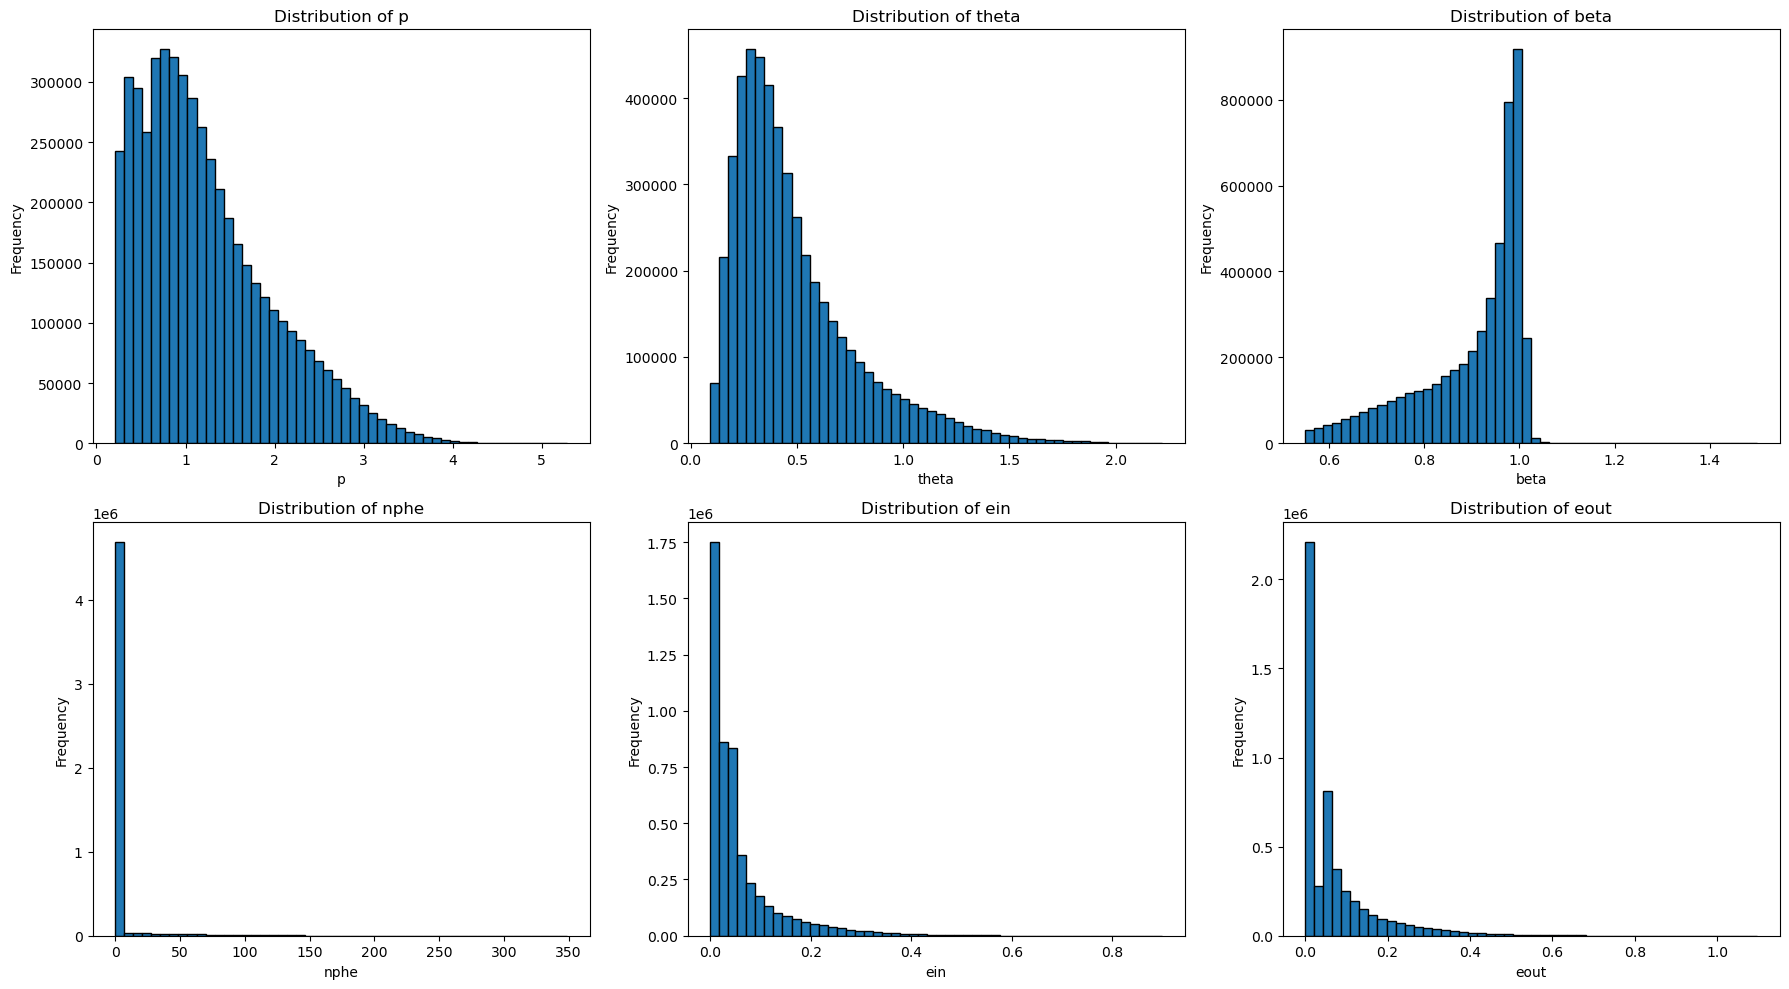

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

variables = ['p', 'theta', 'beta', 'nphe', 'ein', 'eout']
for i, var in enumerate(variables):
    axs[i].hist(df[var], bins=50, color='tab:blue', edgecolor='black')
    axs[i].set_title(f'Distribution of {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Text(0, 0.5, '$\\beta$')

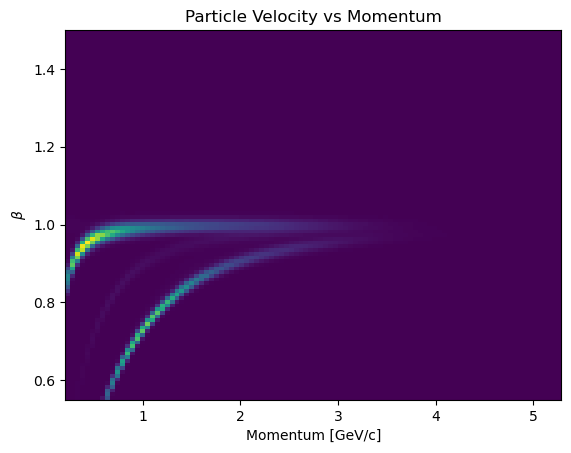

In [ ]:
# Momentum vs Velccity
# TODO: Can you plot the theory expectations ?!
_ = plt.hist2d(df.p, df.beta, bins=[100, 100])
plt.title("Particle Velocity vs Momentum")
plt.xlabel("Momentum [GeV/c]")
plt.ylabel(r"$\beta$")

## Particle Identification Using a Decision Tree Classifier

In this section, we use a **Decision Tree Classifier** from `scikit-learn` to predict the type of particle (`id`) based on several physical features recorded in the experiment.

### Objective

Given features such as momentum, angle, energy, and number of photoelectrons, we aim to classify particles into types using their PDG code (`id`). For example:
- `211` → charged pion (π⁺)
- `2212` → proton (p)

---

### Features Used

We extract the following columns as input features (`X`):
- `p`: momentum
- `theta`: polar angle
- `beta`: velocity relative to the speed of light (v/c)
- `nphe`: number of photoelectrons
- `ein`: incoming energy
- `eout`: outgoing energy

The target variable (`y`) is:
- `id`: the particle type (PDG code)

---

### Steps Followed

1. **Train/Test Split**  
   We split the dataset into:
   - 80% for training the model
   - 20% for testing its performance

2. **Model Initialization**  
   We use a `DecisionTreeClassifier` with:
   - `criterion="entropy"` to measure information gain
   - `max_depth=5` to prevent overfitting

3. **Training**  
   The model learns how particle features relate to particle type from the training data.

4. **Evaluation**  
   - Predictions are made on the test set.
   - We use `classification_report` to display precision, recall, and F1-score.
   - A confusion matrix visually shows how well the classifier distinguishes between particle types.

---

### Output Summary

- The **confusion matrix** shows perfect separation between particle types for this dataset.
- The **classification report** confirms high precision and recall, though real-world performance may vary with larger and noisier data.

This provides a simple but powerful demonstration of how basic physics features can be used for automatic particle identification using decision trees.


              precision    recall  f1-score   support

         211       1.00      0.99      0.99    561198
        2212       0.98      0.99      0.99    389339

    accuracy                           0.99    950537
   macro avg       0.99      0.99      0.99    950537
weighted avg       0.99      0.99      0.99    950537



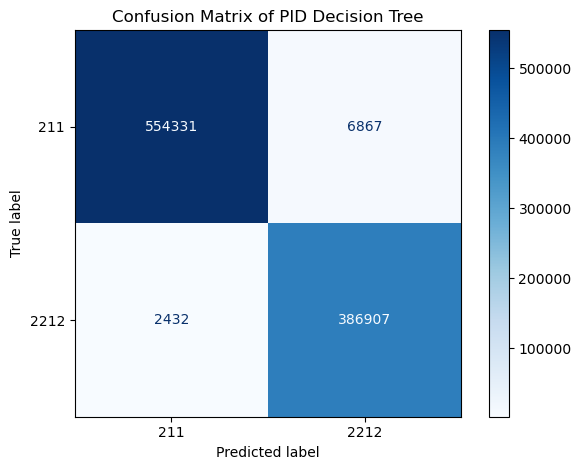

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ==========================
# 1. Select Features & Target
# ==========================
# We use physical measurements as features (X)
# and the particle ID ('id') as the target (y)
# For Simpicity We will ONLY USE 2 classes (Protons=2212 and Pions=211)

df = df[df['id'].isin([211, -211, 2212])]
X = df[['p', 'theta', 'beta', 'nphe', 'ein', 'eout']]
y = df['id']

# ==========================
# 2. Split into Train & Test
# ==========================
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==========================
# 3. Initialize Classifier
# ==========================
# Use entropy (i.e., information gain) as the split criterion
# Set max_depth to limit tree growth and avoid overfitting
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# ==========================
# 4. Train the Model
# ==========================
clf.fit(X_train, y_train)

# ==========================
# 5. Make Predictions
# ==========================
y_pred = clf.predict(X_test)

# ==========================
# 6. Evaluate Performance
# ==========================
# Print precision, recall, F1-score, etc.
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, cmap='Blues', values_format='d'
)
plt.title("Confusion Matrix of PID Decision Tree")
plt.tight_layout()
plt.show()

## Visualize the Tree

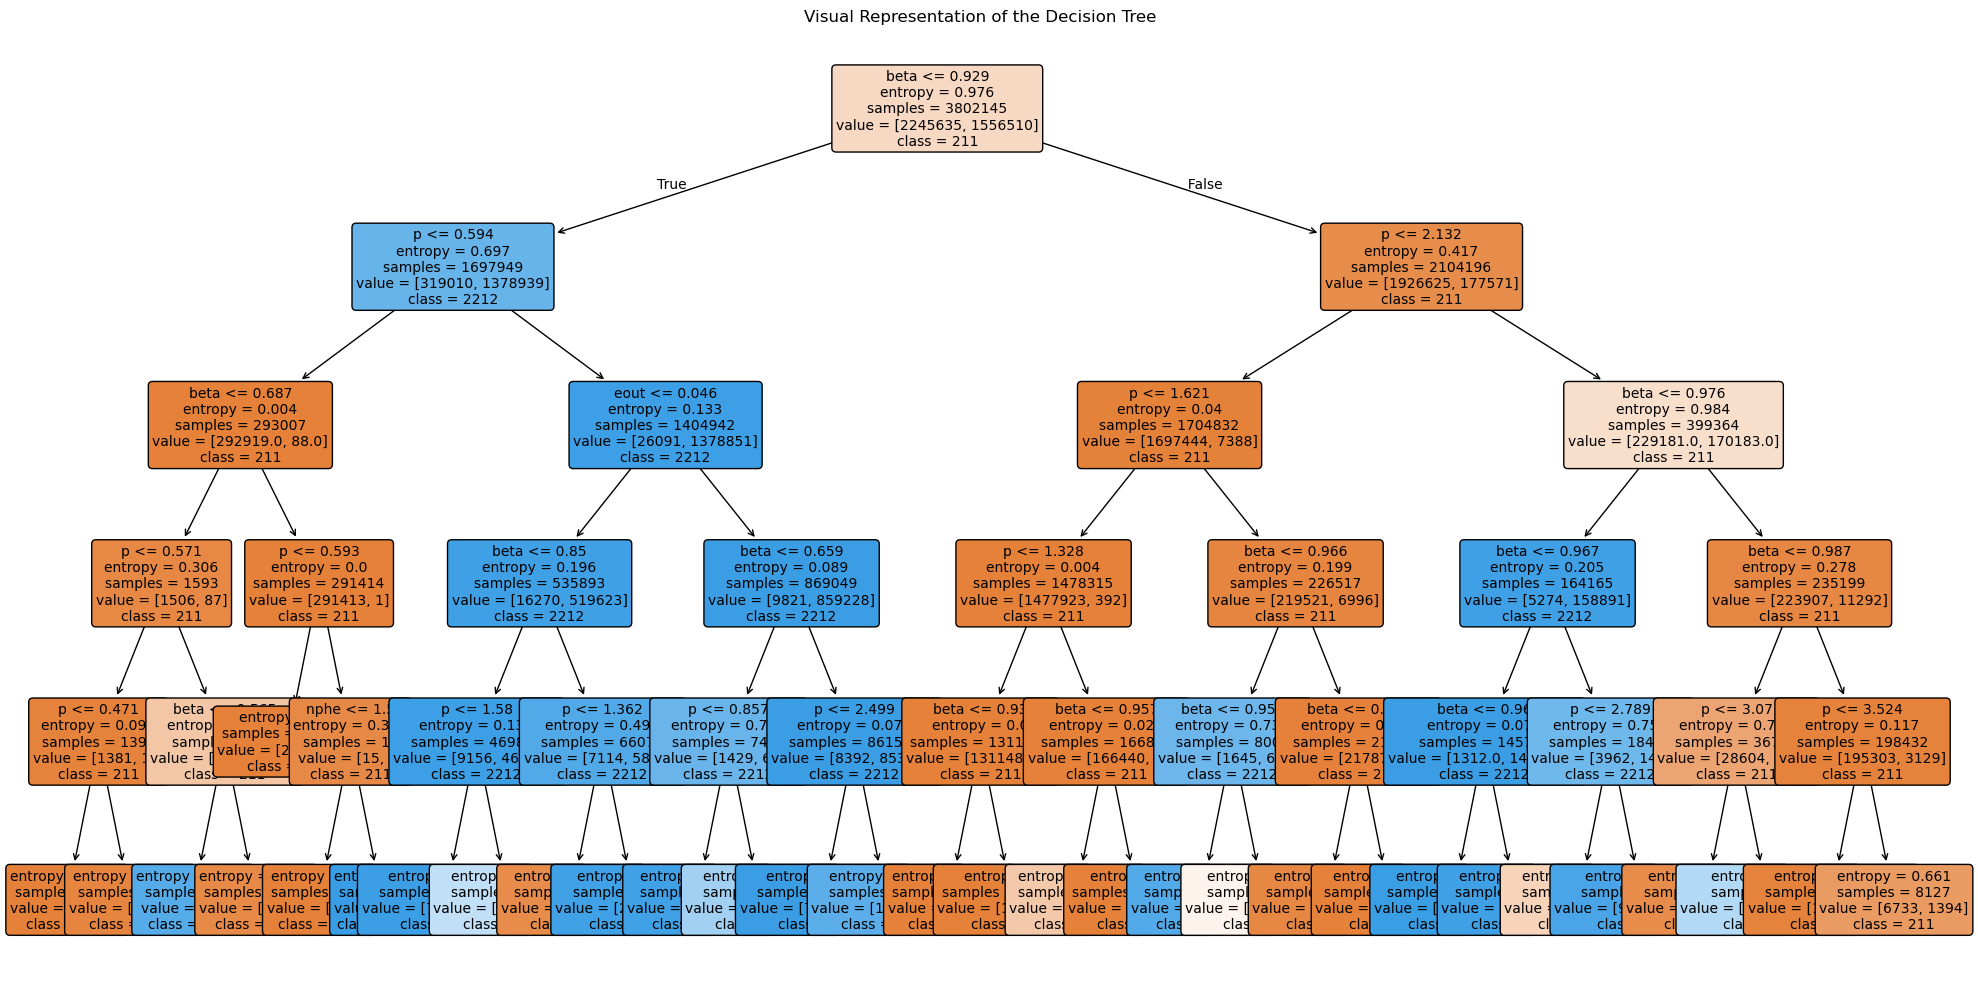

In [10]:
# ==========================
# 7. Plotting the Decision Tree
# ==========================

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Set the size of the tree plot

plot_tree(
    clf,
    feature_names=X.columns,                          # Column names used for splitting
    class_names=[str(cls) for cls in clf.classes_],   # Class labels as strings
    filled=True,                                      # Color nodes by class
    rounded=True,                                     # Rounded boxes
    fontsize=10                                       # Font size for text
)

plt.title("Visual Representation of the Decision Tree")
plt.tight_layout()
plt.show()


## Particle Identification Using a Random Forest

Random Forest Classification Report:

              precision    recall  f1-score   support

         211       0.99      0.99      0.99    561198
        2212       0.98      0.99      0.98    389339

    accuracy                           0.99    950537
   macro avg       0.99      0.99      0.99    950537
weighted avg       0.99      0.99      0.99    950537



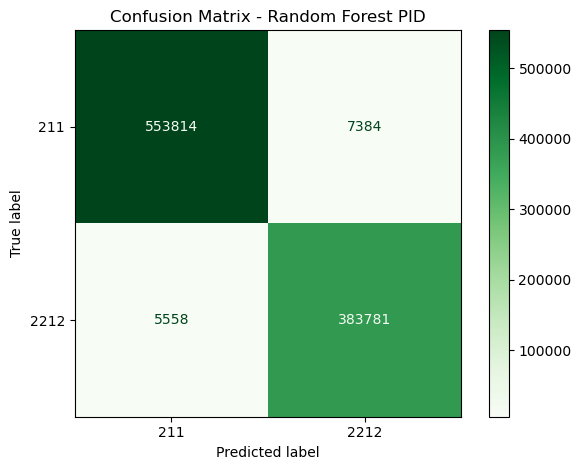

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ============================================
# 1. Define Features and Target
# ============================================
# X: features based on particle measurements
# y: particle ID (target to predict)
X = df[['p', 'theta', 'beta', 'nphe', 'ein', 'eout']]
y = df['id']

# ============================================
# 2. Split into Train/Test Sets
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================
# 3. Initialize the Random Forest Classifier
# ============================================
rf_clf = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    criterion='entropy',     # Use entropy (information gain) for splits
    max_depth=5,             # Limit tree depth to avoid overfitting
    random_state=42          # Ensure reproducibility
)

# ============================================
# 4. Train the Random Forest on Training Data
# ============================================
rf_clf.fit(X_train, y_train)

# ============================================
# 5. Predict on the Test Set
# ============================================
y_pred_rf = rf_clf.predict(X_test)

# ============================================
# 6. Evaluate the Model
# ============================================
# Classification metrics: precision, recall, f1-score
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_estimator(
    rf_clf, X_test, y_test, cmap='Greens', values_format='d'
)
plt.title("Confusion Matrix - Random Forest PID")
plt.tight_layout()
plt.show()


## Particle Identification Using AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# 1. Initialize AdaBoost classifier
ada_clf = AdaBoostClassifier(
    n_estimators=100,        # Number of weak learners
    learning_rate=1.0,       # Controls the impact of each tree
    random_state=42
)

# 2. Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# 3. Predict on test set
ada_pred = ada_clf.predict(X_test)

# 4. Evaluate the model
print("AdaBoost Classification Report:\n")
print(classification_report(y_test, ada_pred))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(
    ada_clf, X_test, y_test, cmap='Oranges', values_format='d'
)
plt.title("Confusion Matrix - AdaBoost PID")
plt.tight_layout()
plt.show()

## Particle Identification Using Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# 1. Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100,      # Number of boosting stages
    learning_rate=0.1,     # Shrinks contribution of each tree
    max_depth=3,           # Maximum depth of each individual tree
    random_state=42
)

# 2. Train the model
gb_clf.fit(X_train, y_train)

# 3. Predict on test data
gb_pred = gb_clf.predict(X_test)

# 4. Evaluate performance
print("Gradient Boosting Classification Report:\n")
print(classification_report(y_test, gb_pred))

# Visualize confusion matrix
ConfusionMatrixDisplay.from_estimator(
    gb_clf, X_test, y_test, cmap='Purples', values_format='d'
)
plt.title("Confusion Matrix - Gradient Boosting PID")
plt.tight_layout()
plt.show()